In [1]:
%matplotlib widget

In [2]:
PDIR = "/scratch/seismo/kashyap/processed/sun-intg"
PAPDIR = '/scratch/seismo/kashyap/cloud/Yandex.Disk/papers-posters-docs/2025-seismo-xl'
channel = 'red'
Ncarr = 4
skip = 60
lmax = 3
incl = 86
PSFDIR = f"{PDIR}/ps-fits/valeriy-{channel}-Ncarr{Ncarr:d}-skip{skip:d}-ell{lmax:d}-i{incl:02d}"
DTDIR = f"{PDIR}/data/valeriy-{channel}-Ncarr{Ncarr:d}-skip{skip:d}"

gfilter = np.load(f'{PSFDIR}/gfilter.npy')
ell = np.load(f'{PSFDIR}/fitted-ell-list.npy')
enn = np.load(f'{PSFDIR}/fitted-enn-list.npy')
nus = np.load(f'{PSFDIR}/fitted-nu-list-mod.npy')
fwhm = np.load(f'{PSFDIR}/fitted-gamma-list-mod.npy')
pobs = np.load(f'{DTDIR}/psref.npy')
amps = np.load(f'{PSFDIR}/fitted-mode-amplitudes.npy')
amps_llk = np.load(f'{PSFDIR}/fitted-mode-amplitudes-mod.npy')
bgamps = np.load(f'{PSFDIR}/fitted-mode-amplitudes-mod.npy')[-2:]
amps_llk[-2:] = bgamps
pslbg1 = np.load(f'{PSFDIR}/fitted-ps-list.npy')
pslbg2 = np.load(f'{PSFDIR}/fitted-ps-list-mod.npy')
freq_mhz = np.load(f'{DTDIR}/freq.npy')*1e3
amps_llk = amps*1.0

mask_peaks = np.zeros_like(freq_mhz, dtype=bool)
for idx, nu in enumerate(nus):
    lw = fwhm[idx]
    minidx = np.argmin(abs(freq_mhz - nu*1e3 + 4*lw*1e3))
    maxidx = np.argmin(abs(freq_mhz - nu*1e3 - 4*lw*1e3))
    mask_peaks[minidx:maxidx] = True

ps1 = (amps @ pslbg1)*gfilter
ps2 = (amps @ pslbg2)*gfilter
ps3 = (amps_llk @ pslbg2)*gfilter

mask0 = ell==0
mask1 = ell==1
mask2 = ell==2
mask3 = ell==3
bgfit = (amps_llk[-2:] @ pslbg2[-2:])*gfilter
psfit0 = (amps_llk[:-2][mask0] @ pslbg2[:-2][mask0, :])*gfilter + bgfit
psfit1 = (amps_llk[:-2][mask1] @ pslbg2[:-2][mask1, :])*gfilter + bgfit
psfit2 = (amps_llk[:-2][mask2] @ pslbg2[:-2][mask2, :])*gfilter + bgfit
psfit3 = (amps_llk[:-2][mask3] @ pslbg2[:-2][mask3, :])*gfilter + bgfit

psfit01 = ((psfit0 - bgfit) + (psfit1 - bgfit) + bgfit)
psfit02 = ((psfit0 - bgfit) + (psfit2 - bgfit) + bgfit)
psfit03 = ((psfit0 - bgfit) + (psfit3 - bgfit) + bgfit)
psfit12 = ((psfit1 - bgfit) + (psfit2 - bgfit) + bgfit)
psfit13 = ((psfit1 - bgfit) + (psfit3 - bgfit) + bgfit)
psfit23 = ((psfit2 - bgfit) + (psfit3 - bgfit) + bgfit)
psfit012 = ((psfit0 - bgfit) + (psfit1 - bgfit) + (psfit2 - bgfit) + bgfit)
psfit013 = ((psfit0 - bgfit) + (psfit1 - bgfit) + (psfit3 - bgfit) + bgfit)
psfit023 = ((psfit0 - bgfit) + (psfit2 - bgfit) + (psfit3 - bgfit) + bgfit)
psfit123 = ((psfit1 - bgfit) + (psfit2 - bgfit) + (psfit3 - bgfit) + bgfit)

pfitlist = [psfit0, psfit1, psfit2, psfit3]

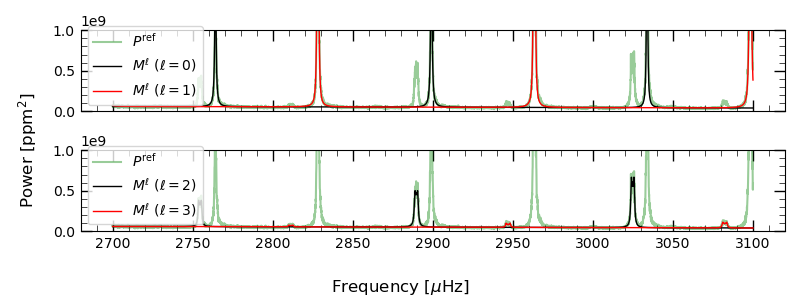

In [3]:
plt.close('all')
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as patches
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 3), sharex=True)
fmin, fmax = 2.5, 4.5
fmin, fmax = 2.2, 3.5
fmin, fmax = 2.7, 3.1
mask = (freq_mhz>fmin) * (freq_mhz<fmax)
for idx in range(2):
    axs[idx].plot(freq_mhz[mask]*1e3, pobs[mask], color='green', lw=1.5, alpha=0.4, label='$P^\\mathrm{ref}$')
    axs[idx].plot(freq_mhz[mask]*1e3, pfitlist[2*idx][mask], color='k', linestyle='solid', lw=1, label='$M^\\ell$ ($\\ell=$'+ f'{2*idx})')
    axs[idx].plot(freq_mhz[mask]*1e3, pfitlist[2*idx+1][mask], color='r', linestyle='solid', lw=1, label='$M^\\ell$ ($\\ell=$'+ f'{2*idx+1})')
    #axs[idx].set_xlim([2., 4.])
    axs[idx].legend()

    x1, x2, y1, y2 = 2.80, 2.92, 0., 2.e8
    #imask = (freq_mhz>x1) * (freq_mhz<x2)
    #ax_inset = inset_axes(axs[idx], width="30%", height="50%", loc="lower left", bbox_to_anchor=(0.05, 0.25, 0.6, 1.), bbox_transform=axs[idx].transAxes,)
    #ax_inset.plot(freq_mhz[imask], pobs[imask], color='green', lw=1, alpha=0.4, label='Data')
    #ax_inset.plot(freq_mhz[imask], pfitlist[2*idx][imask], color='k', lw=1, label='$M^\\ell$ ($\\ell=$'+ f'{2*idx})')
    #ax_inset.plot(freq_mhz[imask], pfitlist[2*idx+1][imask], color='r', linestyle='dashed',  lw=1, label='$M^\\ell$ ($\\ell=$'+ f'{2*idx+1})')
    #ax_inset.set_ylim([y1, y2])
    axs[idx].set_ylim([0., 1e9])
    axs[idx].set_xscale('linear')
    axs[idx].set_yscale('linear')
fig.supxlabel('Frequency [$\\mu$Hz]')
fig.supylabel('Power [ppm${}^2$]')
fig.tight_layout()
fig.savefig(f'{PAPDIR}/mi-filters.pdf')
plt.show()